### Artem Moskalev

# Telephone Touch Tones

The aim of this exercise is to present the way telephone tones system works by using signals of different frequency in order to detect which key is pressed. The detection of these frequencies is possible using the Discrete Fourier Transform (DFT) $X[k]$ of the telephone signal $x[n]$. By pressing a key on the phone, a sound is played which is the summation of two sinuses from which the high frequency sinusoid defines the column and the low frequency sinusoid defines the row of the touchpad according to the matrix that follows. 


|         |        | $Ω_{column}$ |        |   |
|---------|--------|------------|--------|---|
| $Ω_{row}$ | 0.9273 | 1.0247     | 1.1328 |   |
| 0.5346  | 1      | 2          | 3      |   |
| 0.5906  | 4      | 5          | 6      |   |
| 0.6535  | 7      | 8          | 9      |   |
| 0.7217  |        | 0          |        |   |
Discrete Frequencies for Telephone Touch Tones for Sampling Frequency equal to 8192Hz.

For example, key 5 is the signal $d_5[n] = sin(0.5906n) + sin(1.0247n)$

(1) Create 10 different tones according to the description. Each tone must have length equal to 1000 samples. Plot the singals in time.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

table = np.arange(1,10)
table = table.reshape(3,3)
table = np.vstack([table, np.array([np.NaN, 0, np.NaN])])
table

array([[  1.,   2.,   3.],
       [  4.,   5.,   6.],
       [  7.,   8.,   9.],
       [ nan,   0.,  nan]])

In [3]:
space = np.arange(1000)

row_freq = np.array([0.5346, 0.5906, 0.6535, 0.7217])
col_freq = np.array([0.9273, 1.0247, 1.1328])
tones =list()
tones_dict = dict()

def define_sin(freq, x):
    return np.sin(freq*x)

for r,each_row_freq in enumerate(row_freq):
    for c,each_col_freq in enumerate(col_freq):
        tones.append(define_sin(each_row_freq,space)+define_sin(each_col_freq,space))
        if not np.isnan(table[r,c]):
            tones_dict[table[r,c]] = tones[-1]
tones = tones[:10]

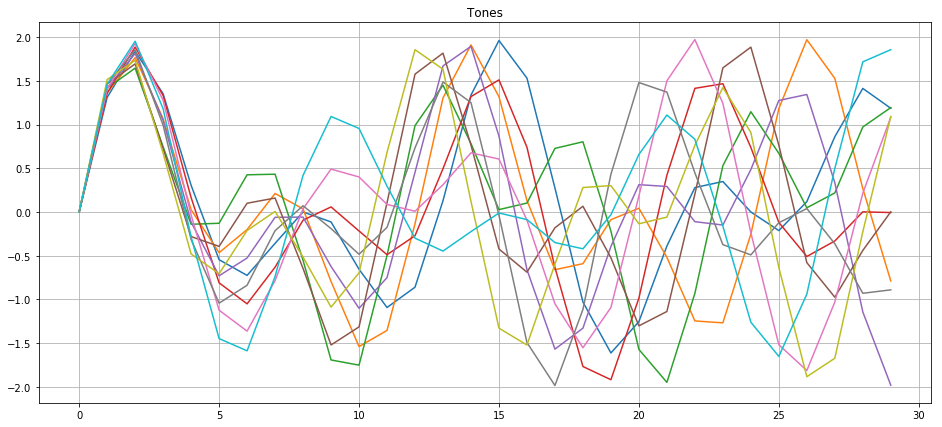

In [4]:
fig = plt.figure(figsize=(16, 7))
for each_tone in tones:
    plt.plot(space[:30], each_tone[:30])

plt.title('Tones')
plt.grid()
plt.show();

(2) Calculate the DFT of signals $d_1[n]$ and $d_8[n]$ and create the plots of $|D_1[k]|$ and $|D_8[k]|$

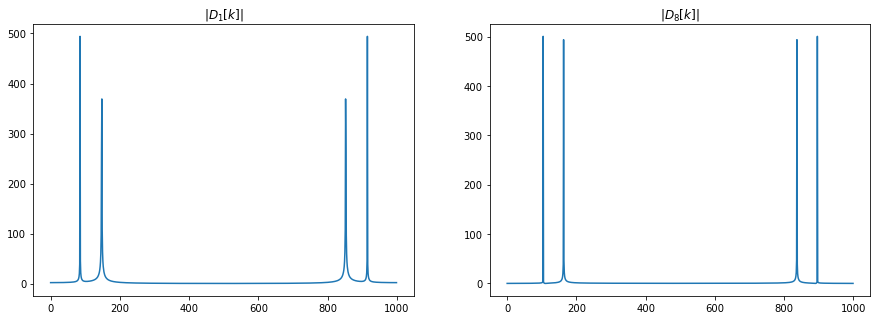

In [5]:
d1 = tones[0]
d8 = tones[7]

d1_dft = np.fft.fft(d1)
d1_dft_mag = np.abs(d1_dft)

d8_dft = np.fft.fft(d8)
d8_dft_mag = np.abs(d8_dft)

fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].plot(d1_dft_mag)
ax[0].set_title('$|D_1[k]|$')
ax[1].plot(d8_dft_mag)
ax[1].set_title('$|D_8[k]|$');

(3) Create a signal with tones by interpreting your date of birth. If you were born on 18 of June 1993 then the signal should be digits 1 8 0 6 1 9 9 3. Each digit should be seperate from the others by inserting 100 zero samples.

In [6]:
date = np.array([1,6,0,5,1,9,9,5])
signal = np.copy(tones_dict[1])
filler = np.zeros(100)
signal = np.concatenate([signal, filler])

#fig, ax = plt.subplots(8,1, figsize=(15,5))
#ax[0].plot(signal)
#ax[0].set_title('1')

for i in range(1,date.shape[0]):
    signal = np.concatenate([signal, tones_dict[date[i]], filler])
    #ax[i].plot(signal)
    #ax[i].set_title(str(date[i]));
    
signal = signal[:-100]

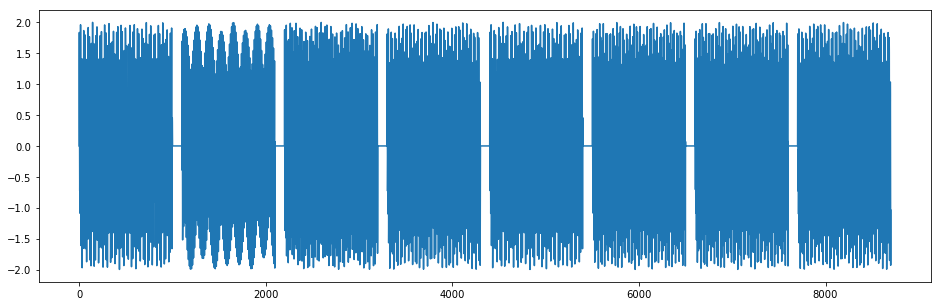

In [7]:
fig = plt.figure(figsize=(16,5))
plt.plot(signal);

(4) Using Numpy fft function and suitable time windows (i.) square, and (ii.) Hamming, with length $N=1000$ calculate the Fourier Transform of the windowed signal you create in the previous step. (**Hint:** Create as many windows signals as the number of tones in the original signal).


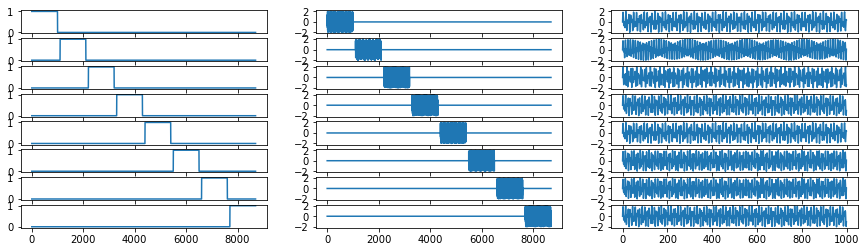

In [9]:
sliding_windows = list()
slided_signals = list()
n = 0
N=1000

fig, ax = plt.subplots(date.shape[0],3, figsize=(15,4))
for i in range(date.shape[0]):
    window = np.zeros(signal.shape[0])
    window[n:n+N] = 1.
    sliding_windows.append(window.copy())
    separated = np.multiply(sliding_windows[i], signal)
    slided_signals.append(separated[n:n+N])
    n = n+N+100
    ax[i,0].plot(sliding_windows[i])
    ax[i,1].plot(separated)
    ax[i,2].plot(slided_signals[i]);

###### Let's check the DFT of one of the slided signals:

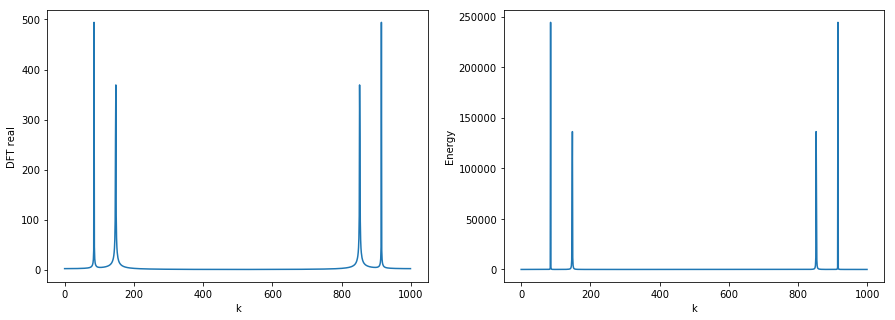

In [11]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(np.abs(np.fft.fft(slided_signals[0])));
ax[1].plot(np.abs(np.fft.fft(slided_signals[0])**2));
ax[0].set_xlabel('k')
ax[1].set_xlabel('k')
ax[0].set_ylabel('DFT real');
ax[1].set_ylabel('Energy');

###### Hamming windowed:

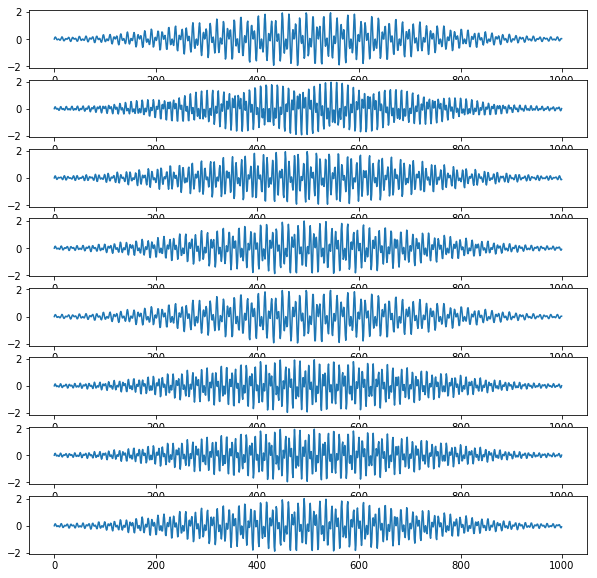

In [12]:
hamming_slided = [each_signal*np.hamming(N) for each_signal in slided_signals]

fig, ax = plt.subplots(len(slided_signals),1, figsize=(10,10))
for i,sig in enumerate(hamming_slided):
    ax[i].plot(sig)

###### Check DFT:

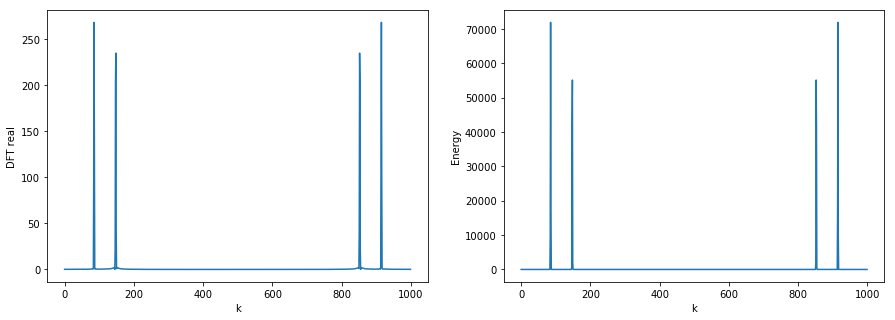

In [13]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(np.abs(np.fft.fft(hamming_slided[0])));
ax[1].plot(np.abs(np.fft.fft(hamming_slided[0])**2));
ax[0].set_xlabel('k')
ax[1].set_xlabel('k')
ax[0].set_ylabel('DFT real')
ax[1].set_ylabel('Energy');

(5) Calculate a list of $k$ indices and their respective frequencies for which you believe that they are close to the touch-tone frequencies.

In [14]:
list(tones_dict.keys())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 0.0]

In [15]:
k_idx = dict()
for each_tone_key in list(tones_dict.keys()):
    ks = np.absolute(np.fft.fft(tones_dict[each_tone_key]))[:500]**2 #cuz it's symmetric
    maximum1, maximum2 = np.sort(ks)[-1],  np.sort(ks)[-2]
    maximum1, maximum2 = np.argwhere(ks==maximum1)[0][0], np.argwhere(ks==maximum2)[0][0]
    k_idx[each_tone_key] = (maximum1, maximum2)

In [16]:
k_idx

{0.0: (163, 115),
 1.0: (85, 148),
 2.0: (85, 163),
 3.0: (85, 180),
 4.0: (94, 148),
 5.0: (94, 163),
 6.0: (94, 180),
 7.0: (104, 148),
 8.0: (104, 163),
 9.0: (104, 180)}

(6) Create a function named $ttdecode$ which will take as input the original touch tone signal (as it was described in question (3)) and it will return the respective digits. For example if $signIn$ is the signal of the tones 985 555 555 then the output of the function will be the vector [9,8,5,5,5,5,5,5,5]. Make sure that your function is correct using as input the signal from question (3).

**Hint:** Your function should calculate the energy of each tone of the input signal using the function fft of Numpy. Thereafter the function should locate the functions with the highest energy and map them to the original frequencies of the table in the description in order to track the respective digit. It is reminded that the energy $E[k]$ of the signal near the frequency with index k is equal to $E_k=|X[k]|^2$.

In [19]:
def ttdecode(signal, energy_map, N=1000, margin=100):
    
    sliding_windows, slided_signals = list(), list()
    n = 0

    k_idx, decoded = list(), list()

    #get slided samples
    for i in range(int(np.round(signal.shape[0]/(N+margin)))):
        window = np.zeros(signal.shape[0])
        window[n:n+N] = 1.
        sliding_windows.append(window.copy())
        separated = np.multiply(sliding_windows[i], signal)
        slided_signals.append(separated[n:n+N])
        n = n+N+100
        
        fr_domain = np.absolute(np.fft.fft(slided_signals[i]))[:500]**2
        maximum1, maximum2 = np.sort(fr_domain)[-1],  np.sort(fr_domain)[-2]
        maximum1, maximum2 = np.argwhere(fr_domain==maximum1)[0][0], np.argwhere(fr_domain==maximum2)[0][0]
        k_idx.append((maximum1, maximum2))
    '''
    for each_slided_signal in slided_signals: #find peaks
        fr_domain = np.absolute(np.fft.fft(each_slided_signal))[:500]**2
        maximum1, maximum2 = np.sort(fr_domain)[-1],  np.sort(fr_domain)[-2]
        maximum1, maximum2 = np.argwhere(fr_domain==maximum1)[0][0], np.argwhere(fr_domain==maximum2)[0][0]
        k_idx.append((maximum1, maximum2))
    '''
    for each_k in k_idx: #match peaks with digits dictionary
        for each_key in list(energy_map.keys()):
            if energy_map[each_key] == each_k:
                decoded.append(each_key)
        
    return list(map(lambda x: int(x), decoded))
    

In [20]:
decoded_signal=ttdecode(signal, energy_map=k_idx)

In [21]:
decoded_signal

[1, 6, 0, 5, 1, 9, 9, 5]

###### Correct. Cheers.

(7) Decode the two provided wav file with names 'easysignal.wav' and 'hardsignal.wav'. Load the wav files, decode them and print your solution.  

Plot and produce sound for every relevant step. Dont forget to comment your code and describe your train of thought.

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const
import scipy
from scipy.io import wavfile
from numpy import hamming # function to create a hamming window
from numpy import fft # class related to fft and inverse fft transforms

In [23]:
# Code example on how to listen audio from jupyter notebook
import IPython.display as ipd
import numpy as np
t = np.arange(1,20000)
example_sound = np.sin(0.5*t) # create a sound with a simple sinusoid
ipd.Audio(example_sound, rate=8192) # load a NumPy array

In [24]:
# load wav file into jupyter notebook
wav_signal_1 = wavfile.read('hardsignal.wav')
freq_1 = wav_signal_1[0]
signal_array_1 = wav_signal_1[1]
ipd.Audio(signal_array_1, rate=freq_1) # load a NumPy array

In [25]:
ttdecode(signal_array_1, energy_map=k_idx)

[0, 0, 9, 1, 2, 5, 5, 7, 8, 9, 9, 0, 4, 3, 5, 2]

In [28]:
# load wav file into jupyter notebook
wav_signal_2 = wavfile.read('easysignal.wav')
freq_2 = wav_signal_2[0]
signal_array_2 = wav_signal_2[1]
ipd.Audio(signal_array_2, rate=freq_2) # load a NumPy array

In [29]:
ttdecode(signal_array_2, energy_map=k_idx)

[0, 0, 9, 1, 2, 5, 5, 7]